In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:130]
y = iris.target[:130]

df = pd.DataFrame(X, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df["Label"] = y

print(df.head())
print(df.tail())

   Sepal Length  Sepal Width  Petal Length  Petal Width  Label
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0
     Sepal Length  Sepal Width  Petal Length  Petal Width  Label
125           7.2          3.2           6.0          1.8      2
126           6.2          2.8           4.8          1.8      2
127           6.1          3.0           4.9          1.8      2
128           6.4          2.8           5.6          2.1      2
129           7.2          3.0           5.8          1.6      2


C:\Users\heosh\AppData\Local\Temp\ipykernel_22716\3907263496.py:29: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\heosh\.conda\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


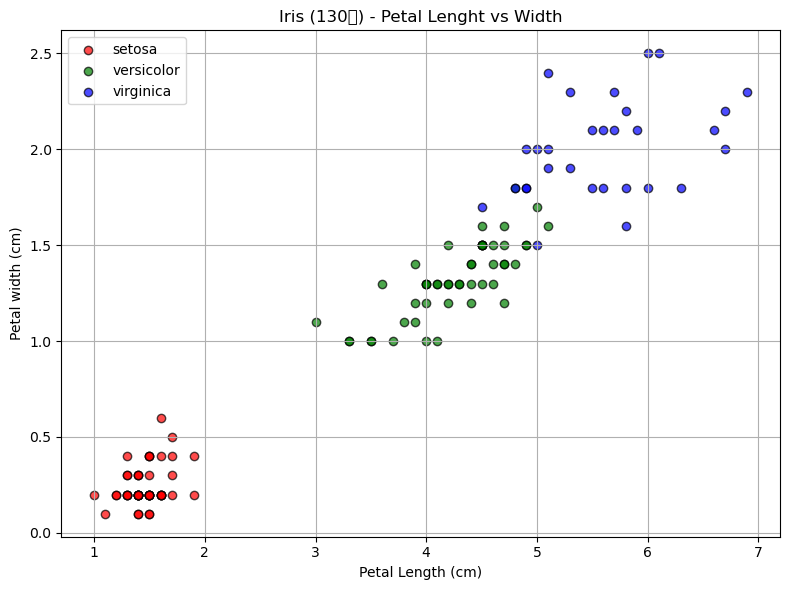

In [4]:
iris = load_iris()
X = iris.data[:130, [2, 3]]
y = iris.target[:130]

df = pd.DataFrame(X, columns=["Petal Length", 'Petal Width'])
df['Label'] = y

plt.figure(figsize = (8, 6))
colors = ['red', 'green', 'blue']
labels = iris.target_names

for i in range(3) :
    subset = df[df["Label"] == i]
    plt.scatter (
        subset["Petal Length"],
        subset["Petal Width"],
        color = colors[i],
        label = labels[i],
        alpha = 0.7,
        edgecolor = 'k'

    )

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Iris (130개) - Petal Lenght vs Width")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:130, [2, 3]]
y = iris.target[:130]

def euclidian_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_predict(x, X_train, y_train, k):
    distances = [euclidian_distance(x, xi) for xi in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]

    labels, counts = np.unique(k_labels, return_counts = True)
    return labels[np.argmax(counts)]

def compute_accuracy(X_val, y_val, X_train, y_train, k):
    correct = 0
    for x, y in zip(X_val, y_val):
        pred = knn_predict(x, X_train, y_train, k)
        if pred == y:
            correct += 1
    return correct / len(y_val)

np.random.seed(45)
indices = np.random.permutation(len(X))
split = int(0.7 * len(X))

train_idx = indices[:split]
val_idx = indices[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

k_candidates = range(1, 11)
best_k = None
best_acc = 0.0

print("k값별 정확도:")
for k in k_candidates:
    acc = compute_accuracy(X_val, y_val, X_train, y_train, k)
    print(f"k = {k} → 정확도: {acc: .2f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\n✅ 최적의 k값은: {best_k} (정확도: {best_acc: .2f})")

X_test = iris.data[130:132, [2, 3]]
y_test = iris.target[130:132]

predictions = [knn_predict(x, X_train, y_train, best_k) for x in X_test]

result_df = pd.DataFrame({
    "Index": [130, 131],
    "Actual": y_test,
    "Predicted": predictions
})

print(result_df)

k값별 정확도:
k = 1 → 정확도:  0.95
k = 2 → 정확도:  0.92
k = 3 → 정확도:  0.92
k = 4 → 정확도:  0.92
k = 5 → 정확도:  0.97
k = 6 → 정확도:  0.92
k = 7 → 정확도:  0.92
k = 8 → 정확도:  0.92
k = 9 → 정확도:  0.95
k = 10 → 정확도:  0.92

✅ 최적의 k값은: 5 (정확도:  0.97)
   Index  Actual  Predicted
0    130       2          2
1    131       2          2
